In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import scienceplots
%matplotlib inline

from nanonets.utils import prepare_for_fitness_calculation, fitness, abundance, abundance_plot, get_best_logic_gate

PATH    = "/home/jonasmensing/bagheera/data/2_funding_period/static/cap_disorder/"
V_IN    = 0.01
GATES   = ['AND', 'OR', 'XOR', 'NAND', 'NOR', 'XNOR']
plt.style.use(["science","bright","grid"])

In [19]:
data = {}
for i in range(64):
    df      = pd.read_csv(f"{PATH}custom_network_{i}.csv")
    df      = prepare_for_fitness_calculation(df, N_e=8, input_cols=["E1","E3"])
    data[i] = df

In [60]:
fitness_data    = {key : fitness(df, input_cols=["E1","E3"], on_state=0.01, delta=0) for key, df in data.items()}
abundance_data  = {key : abundance(df) for key, df in fitness_data.items()}

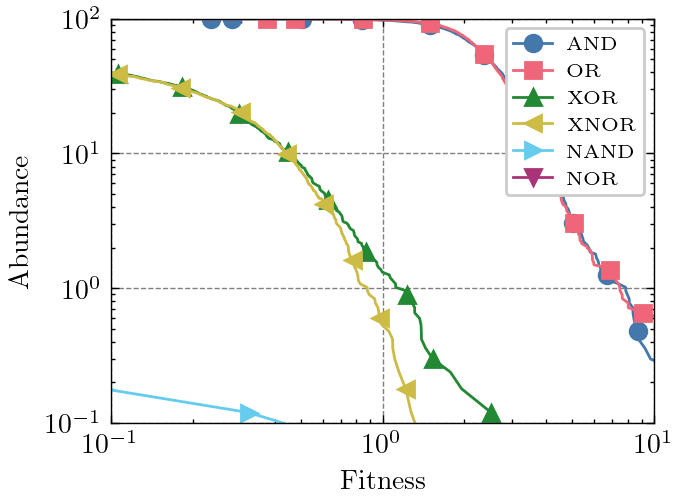

In [64]:
fig, ax = abundance_plot(abundance_data[2], x_limits=[0.1,10], y_limits=[0.1,100])

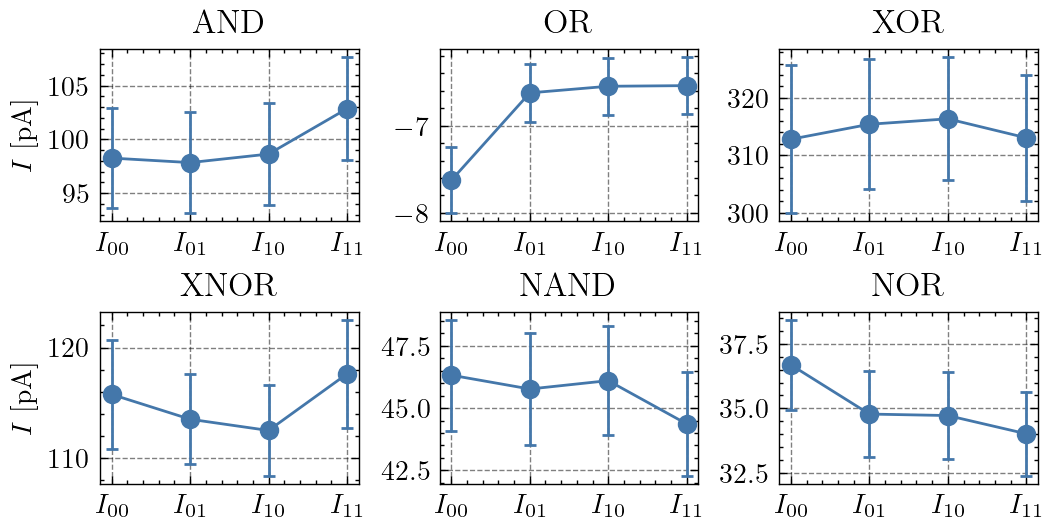

In [62]:
n   = 0
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*1.5)
for i, gate in enumerate(GATES):
    ax = fig.add_subplot(2,3,i+1)
    best_gate = get_best_logic_gate(data[n], fitness_data[n], gate)
    ax.errorbar([0,1,2,3], best_gate['Observable'].values*1e-6, best_gate['Error'].values*1e-6, marker='o', capsize=2)
    ax.set_xticks([0,1,2,3])
    ax.set_xticklabels(["$I_{00}$","$I_{01}$","$I_{10}$","$I_{11}$"])
    ax.set_title(gate)
    if i % 3 == 0:
        ax.set_ylabel("$I$ [pA]")